# AutoEncoder

In [1]:
import tensorflow as tf
from examples.autoencoder.utils import *
from examples.autoencoder.layers import *


def encoder(input):
    # Create a conv network with 3 conv layers and 1 FC layer
    # Conv 1: filter: [3, 3, 1], stride: [2, 2], relu
    #conv1 = conv(input, "convlayer1", [3, 3, 1], [2, 2], padding='SAME', non_linear_fn=tf.nn.relu)

    # Conv 2: filter: [3, 3, 8], stride: [2, 2], relu
    #conv2 = conv(conv1, "convlayer2", [3, 3, 8], [2, 2], padding='SAME', non_linear_fn=tf.nn.relu)

    # Conv 3: filter: [3, 3, 8], stride: [2, 2], relu
    #conv3 = conv(conv2, "convlayer3", [3, 3, 8], [2, 2], padding='SAME', non_linear_fn=tf.nn.relu)

    # FC: output_dim: 100, no non-linearity
    #return fc(conv3, "fclayer", 100, non_linear_fn=None)

    conv1 = conv(input, 'conv1', [3, 3, 1], [2, 2])
    conv2 = conv(conv1, 'conv2', [3, 3, 8], [2, 2])
    conv3 = conv(conv2, 'conv3', [3, 3, 8], [2, 2])
    fc_enc = fc(conv3, 'fc_enc', 100, non_linear_fn=None)
    return fc_enc

In [2]:
def decoder(input):
    # Create a deconv network with 1 FC layer and 3 deconv layers
    # FC: output dim: 128, relu
    #fc_de = fc(input, "decode_fc", 128)

    # Reshape to [batch_size, 4, 4, 8]
    #fc_de = tf.reshape(fc_de, [-1, 4, 4, 8])

    # Deconv 1: filter: [3, 3, 8], stride: [2, 2], relu

    #deconv1 = deconv(fc_de, "deconv1", [3, 3, 8], [2, 2])

    # Deconv 2: filter: [8, 8, 1], stride: [2, 2], padding: valid, relu

    #deconv2 = deconv(deconv1, "deconv2", [8, 8, 1], [2, 2], padding='VALID')

    # Deconv 3: filter: [7, 7, 1], stride: [1, 1], padding: valid, sigmoid
    #deconv3 = deconv(deconv2, "deconv3", [7, 7, 1], [1, 1], padding='VALID',
                     #non_linear_fn=tf.sigmoid)

    #return deconv3
    fc_dec = fc(input, 'fc_dec', 128)
    fc_dec_reshaped = tf.reshape(fc_dec, [-1, 4, 4, 8])
    deconv1 = deconv(fc_dec_reshaped, 'deconv1', [3, 3, 8], [2, 2])
    deconv2 = deconv(deconv1, 'deconv2', [8, 8, 1], [2, 2], padding='VALID')
    deconv3 = deconv(deconv2, 'deconv3', [7, 7, 1], [1, 1], padding='VALID', non_linear_fn=tf.sigmoid)
    return deconv3

In [3]:
def autoencoder(input_shape):
    # Define place holder with input shape
    #X = tf.placeholder(tf.float32, input_shape)
    # Define variable scope for autoencoder
    #with tf.variable_scope('autoencoder') as scope:
        # Pass input to encoder to obtain encoding
        #encode = encoder(X)
        # Pass encoding into decoder to obtain reconstructed image
        #decode = decoder(encode)
        # Return input image (placeholder) and reconstructed image
        #return X, decode
    
    input_image = tf.placeholder(tf.float32,
                                 input_shape,
                                 name='input_image')

    with tf.variable_scope('autoencoder') as scope:
        encoding = encoder(input_image)
        reconstructed_image = decoder(encoding)
        return input_image, reconstructed_image

In [4]:
batch_size = 100
batch_shape = (batch_size, 28, 28, 1)
num_visualize = 10

lr = 0.01
num_epochs = 50

In [5]:
def calculate_loss(original, reconstructed):
    return tf.div(tf.reduce_sum(tf.square(tf.subtract(reconstructed,
                                                 original))), 
                  tf.constant(float(batch_size)))

def train(dataset):
    input_image, reconstructed_image = autoencoder(batch_shape)
    loss = calculate_loss(input_image, reconstructed_image)
    optimizer = tf.train.GradientDescentOptimizer(lr).minimize(loss)

    init = tf.global_variables_initializer()
    with tf.Session() as session:
        session.run(init)

        dataset_size = len(dataset.train.images)
        print("Dataset size:", dataset_size)
        num_iters = int((num_epochs * dataset_size)/batch_size)
        print("Num iters:", num_iters)
        for step in range(num_iters):
            input_batch  = get_next_batch(dataset.train, batch_size)
            loss_val,  _ = session.run([loss, optimizer], 
                                       feed_dict={input_image: input_batch})
            if step % 1000 == 0:
                print("Loss at step", step, ":", loss_val)

        test_batch = get_next_batch(dataset.test, batch_size)
        reconstruction = session.run(reconstructed_image,
                                     feed_dict={input_image: test_batch})
        visualize(test_batch, reconstruction, num_visualize)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Dataset size: 55000
Num iters: 27500
Loss at step 0 : 109.0
Loss at step 1000 : 74.7032
Loss at step 2000 : 67.346
Loss at step 3000 : 73.102
Loss at step 4000 : 71.7425
Loss at step 5000 : 72.9848
Loss at step 6000 : 68.5668
Loss at step 7000 : 78.8067
Loss at step 8000 : 74.069
Loss at step 9000 : 73.6292
Loss at step 10000 : 77.0401
Loss at step 11000 : 72.4566
Loss at step 12000 : 74.0477
Loss at step 13000 : 72.9015
Loss at step 14000 : 76.974
Loss at step 15000 : 73.2306
Loss at step 16000 : 71.3954
Loss at step 17000 : 76.2503
Loss at step 18000 : 77.7788
Loss at step 19000 : 75.4849
Loss at step 20000 : 69.9086
Loss at step 21000 : 74.902
Loss at step 22000 : 77.0754
Loss at step 23000 : 72.4134
Loss at step 24000 : 76.1562
Loss at step 25000 : 73.5393
Loss at step 26000 : 76.1551
Loss a

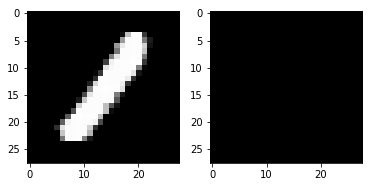

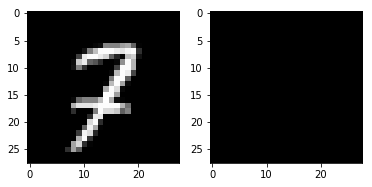

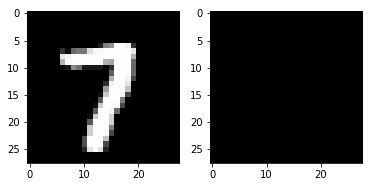

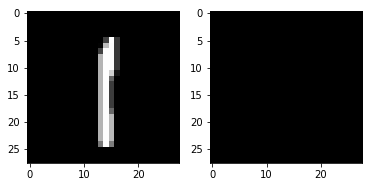

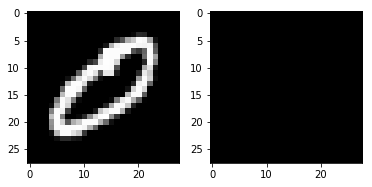

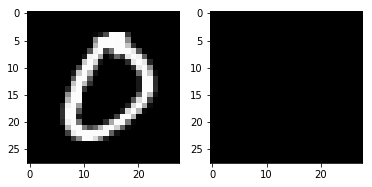

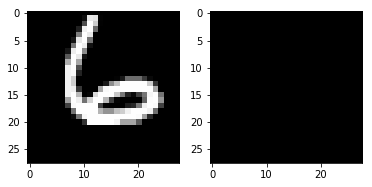

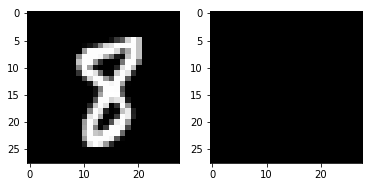

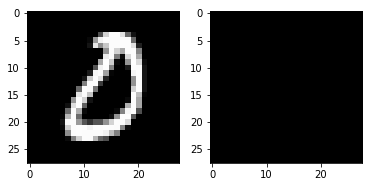

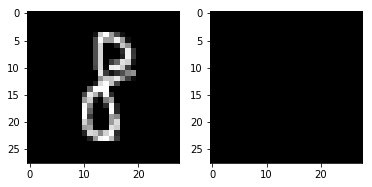

In [6]:
if __name__ == '__main__':
    tf.reset_default_graph()
    dataset = load_dataset()
    train(dataset)